In [1]:
getwd()
options(repos = 'http://mirrors.ustc.edu.cn/CRAN/') 

[1] "C:/Users/Administrator/Desktop/R/R practice"

In [2]:
install.packages('boot')

package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpaiLE0B\downloaded_packages


In [3]:
# 引导单个统计量（k = 1）
# 以下示例生成汽车重量（wt）和排水量（disp）的英里/加仑（mpg）线性回归中R平方的引导95％置信区间。数据源是mtcars。自举置信区间基于1000次重复。


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = mtcars, statistic = rsq, R = 1000, formula = mpg ~ 
    wt + disp)


Bootstrap Statistics :
     original     bias    std. error
t1* 0.7809306 0.01383836  0.04824723

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.6199,  0.8484 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

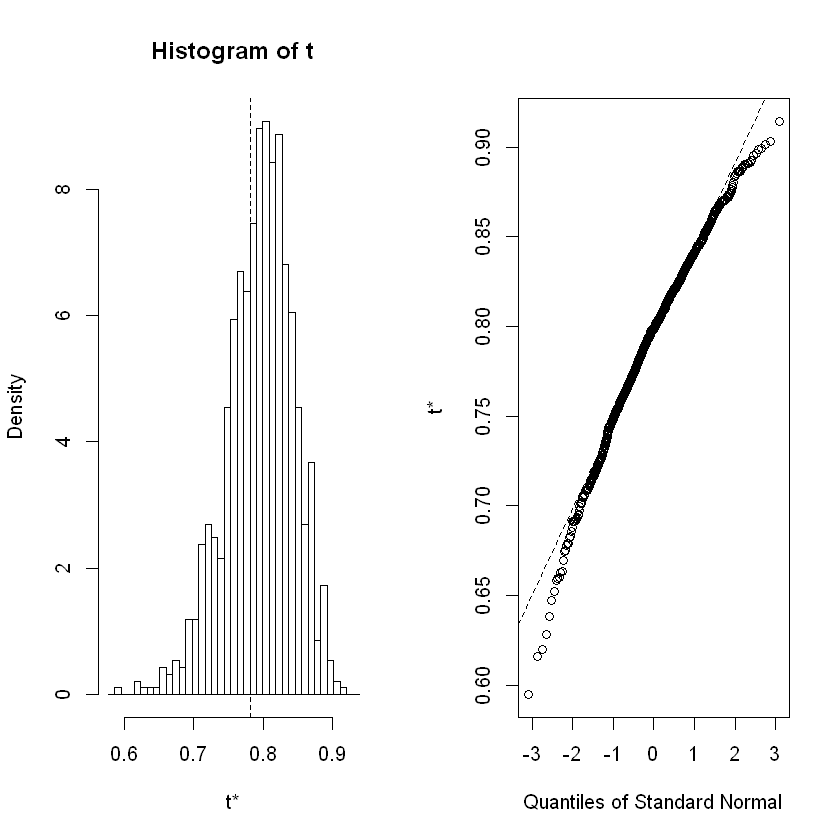

In [4]:
# Bootstrap 95% CI for R-Squared
library(boot)
# function to obtain R-Squared from the data 
rsq <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample 
  fit <- lm(formula, data=d)
  return(summary(fit)$r.square)
} 
# bootstrapping with 1000 replications 
results <- boot(data=mtcars, statistic=rsq, 
  	R=1000, formula=mpg~wt+disp)

# view results
results 
plot(results)

# get 95% confidence interval 
boot.ci(results, type="bca")

In [5]:
# 自举几个统计（k> 1）
# 在上面的例子中，函数rsq返回一个数字，boot.ci返回一个置信区间。您提供的统计功能也可以返回一个向量。
# 在下一个例子中，我们得到了三个模型回归系数（截距，汽车重量，排量）的95％CI。在这种情况下，我们将
# 一个索引参数添加到plot（）和boot.ci（），以指示要分析bootobject中的哪一列。


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = mtcars, statistic = bs, R = 1000, formula = mpg ~ 
    wt + disp)


Bootstrap Statistics :
       original        bias    std. error
t1* 34.96055404  1.314614e-01 2.477187901
t2* -3.35082533 -6.563813e-02 1.136313477
t3* -0.01772474  9.023921e-05 0.008474689

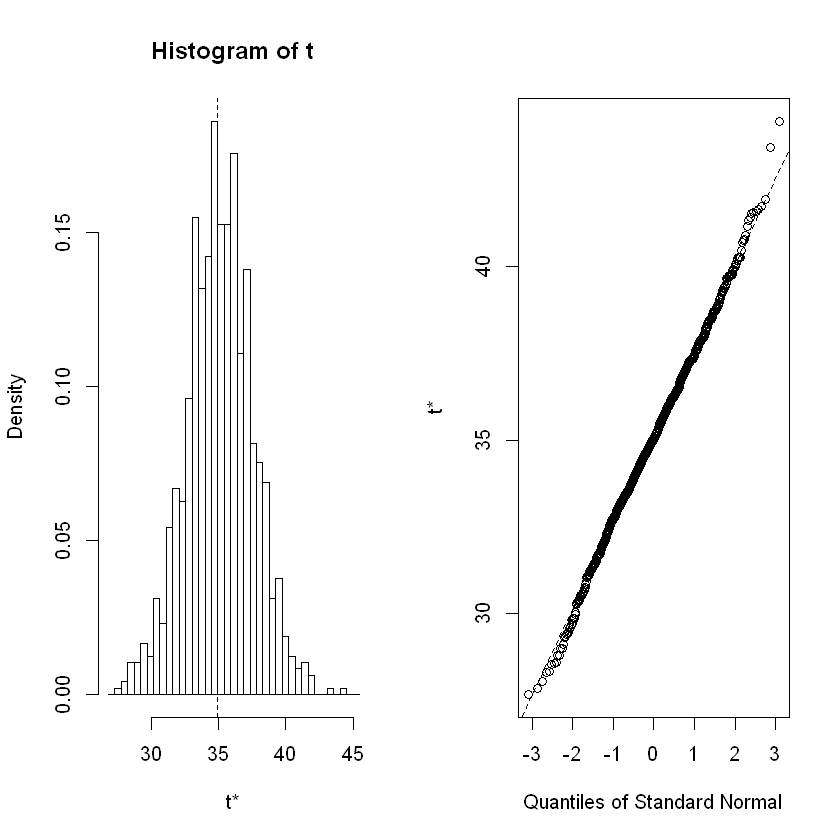

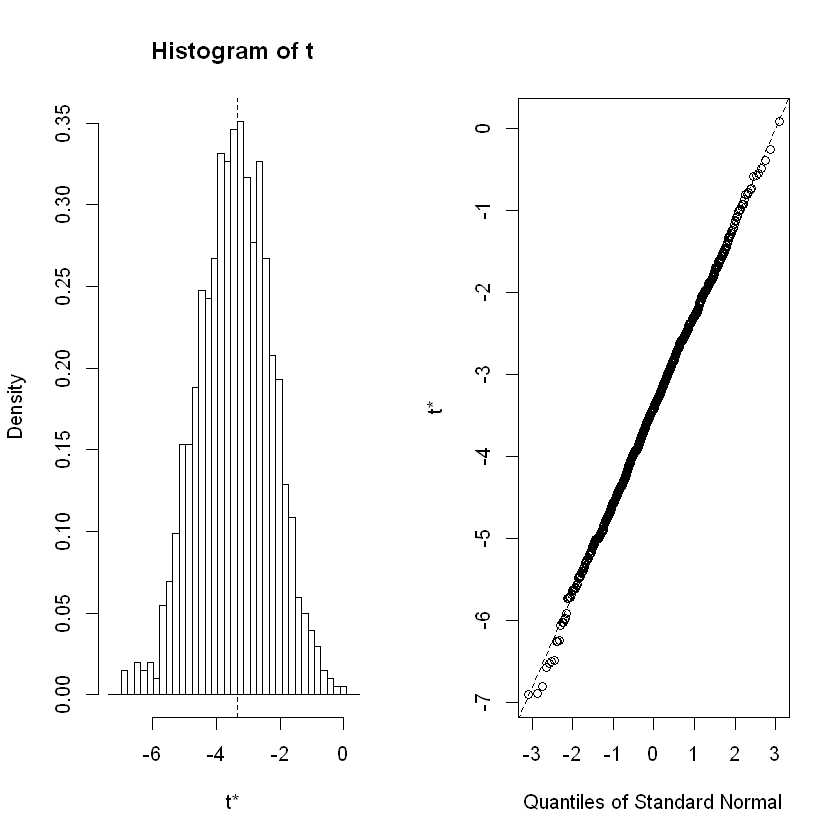

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca", index = 1)

Intervals : 
Level       BCa          
95%   (29.58, 39.73 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca", index = 2)

Intervals : 
Level       BCa          
95%   (-5.458, -0.990 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca", index = 3)

Intervals : 
Level       BCa          
95%   (-0.0335,  0.0006 )  
Calculations and Intervals on Original Scale

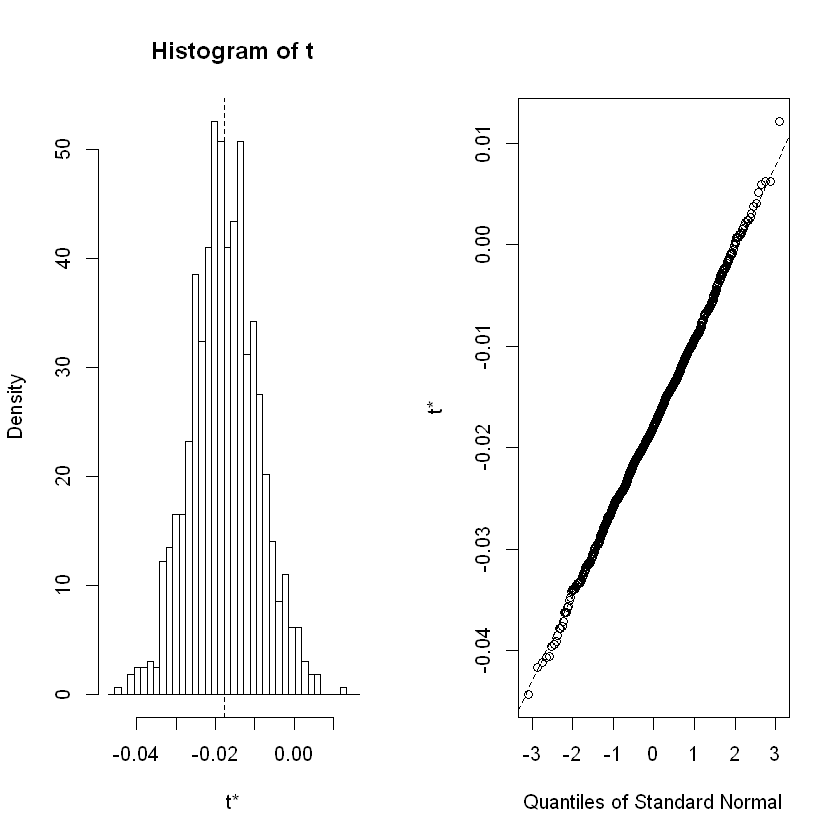

In [6]:
# Bootstrap 95% CI for regression coefficients 
library(boot)
# function to obtain regression weights 
bs <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample 
  fit <- lm(formula, data=d)
  return(coef(fit)) 
} 
# bootstrapping with 1000 replications 
results <- boot(data=mtcars, statistic=bs, 
  	R=1000, formula=mpg~wt+disp)

# view results
results
plot(results, index=1) # intercept 
plot(results, index=2) # wt 
plot(results, index=3) # disp 

# get 95% confidence intervals 
boot.ci(results, type="bca", index=1) # intercept 
boot.ci(results, type="bca", index=2) # wt 
boot.ci(results, type="bca", index=3) # disp

In [7]:
#在启动（）函数可以产生两种非参数和参数重采样。对于非参数bootstrap，重采样方法包括普通，平衡，对立和置换。
#对于非参数自举，支持分层重采样。重要性重采样权重也可以被指定。
#所述boot.ci（）函数获得一个bootobject并产生5种不同类型的双面非参数的置信区间。
#这些包括一阶正态近似，基本自举时间间隔，学生化自举时间间隔，自举百分位数间隔以及调整后的自举百分位数（BCa）间隔。
#查看帮助（引导），帮助（boot.ci）和帮助（plot.boot）以获取更多详细信息。